In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Cargar datos
End_Inv = pd.read_csv('/content/EndInvFinal.csv')

In [3]:
End_Inv.shape

(208412, 9)

In [4]:
End_Inv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208412 entries, 0 to 208411
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  208412 non-null  object 
 1   Store        208412 non-null  int64  
 2   City         207128 non-null  object 
 3   Brand        208411 non-null  float64
 4   Description  208411 non-null  object 
 5   Size         208411 non-null  object 
 6   onHand       208411 non-null  float64
 7   Price        208411 non-null  float64
 8   endDate      208411 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 14.3+ MB


In [6]:
# Formato Fecha
End_Inv['endDate'] = pd.to_datetime(End_Inv['endDate'])
End_Inv.set_index('endDate', inplace=True)

In [7]:
End_Inv.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price
endDate,,,,,,,,
2016-12-31,1_HARDERSFIELD_58,1,HARDERSFIELD,58.0,Gekkeikan Black & Gold Sake,750mL,11.0,12.99
2016-12-31,1_HARDERSFIELD_62,1,HARDERSFIELD,62.0,Herradura Silver Tequila,750mL,7.0,36.99
2016-12-31,1_HARDERSFIELD_63,1,HARDERSFIELD,63.0,Herradura Reposado Tequila,750mL,7.0,38.99
2016-12-31,1_HARDERSFIELD_72,1,HARDERSFIELD,72.0,No. 3 London Dry Gin,750mL,4.0,34.99
2016-12-31,1_HARDERSFIELD_75,1,HARDERSFIELD,75.0,Three Olives Tomato Vodka,750mL,7.0,14.99


In [9]:
End_Inv.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 208412 entries, 2016-12-31 to NaT
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  208412 non-null  object 
 1   Store        208412 non-null  int64  
 2   City         207128 non-null  object 
 3   Brand        208411 non-null  float64
 4   Description  208411 non-null  object 
 5   Size         208411 non-null  object 
 6   onHand       208411 non-null  float64
 7   Price        208411 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 14.3+ MB


In [10]:
#Análisis Estadístico con Pandas y Numpy: propiedades estadísticas del Dataset.
# Calcula medidas de tendencia central, la media, mediana, desviación estándar, mínimo y máximo
#de cada columna

for i in End_Inv.columns:
    print(i)
    print(End_Inv[i].describe())
    print('---------------------------------')

InventoryId
count                208412
unique               208412
top       1_HARDERSFIELD_58
freq                      1
Name: InventoryId, dtype: object
---------------------------------
Store
count    208412.000000
mean         40.827855
std          22.038562
min           1.000000
25%          22.000000
50%          41.000000
75%          60.000000
max          76.000000
Name: Store, dtype: float64
---------------------------------
City
count        207128
unique           64
top       MOUNTMEND
freq          18065
Name: City, dtype: object
---------------------------------
Brand
count    208411.000000
mean      14243.975193
std       13093.189219
min          58.000000
25%        3776.000000
50%        8203.000000
75%       23858.000000
max       90631.000000
Name: Brand, dtype: float64
---------------------------------
Description
count                   208411
unique                    8695
top       Jagermeister Liqueur
freq                       432
Name: Description, dtype

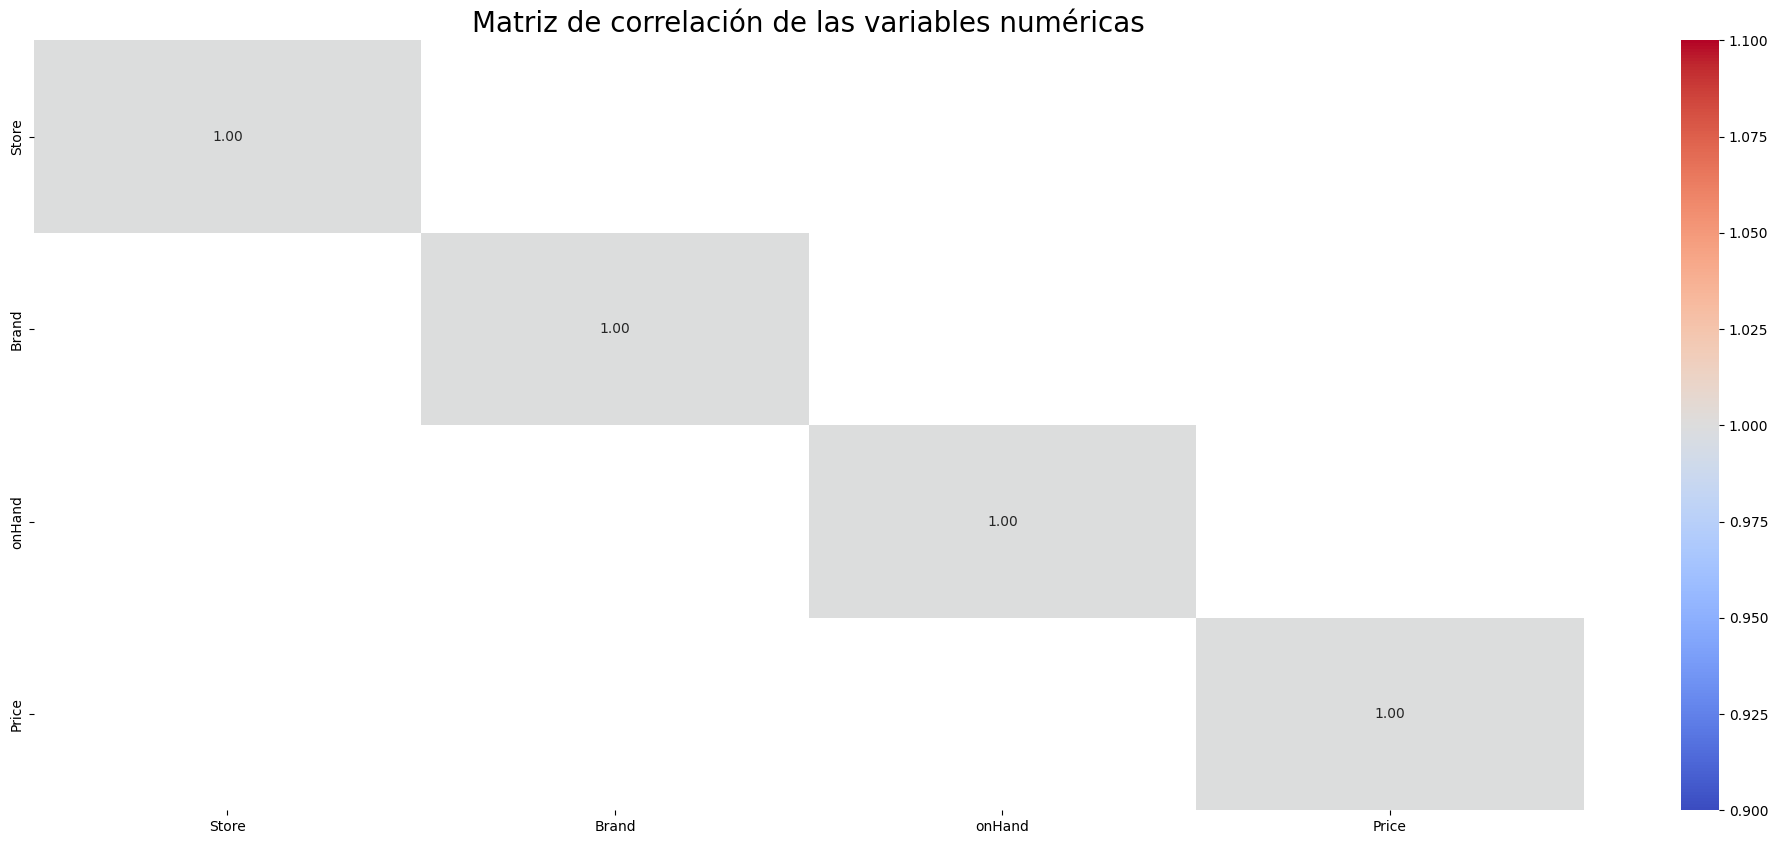

In [11]:
#Se crea la matriz de correlación de las variables numéricas para verificar alguna correlación que permita análisis
numeric_columns = End_Inv.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = End_Inv[numeric_columns].corr()

# Vamos a mostrar valores superiores a 0.5 (donde hay una correlación fuerte) OPCIONAL
correlation_matrix = correlation_matrix[abs(correlation_matrix) > abs(0.5)]

# Se crea la gráfica
plt.figure(figsize=(25, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación de las variables numéricas', fontsize=20)
plt.show()

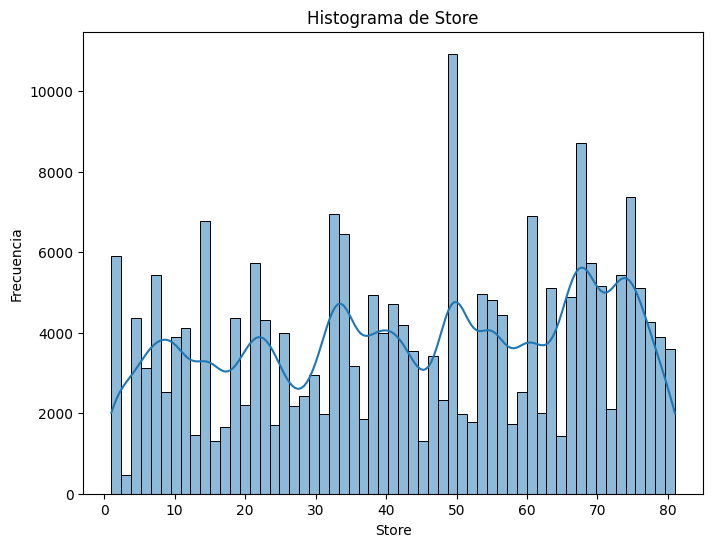

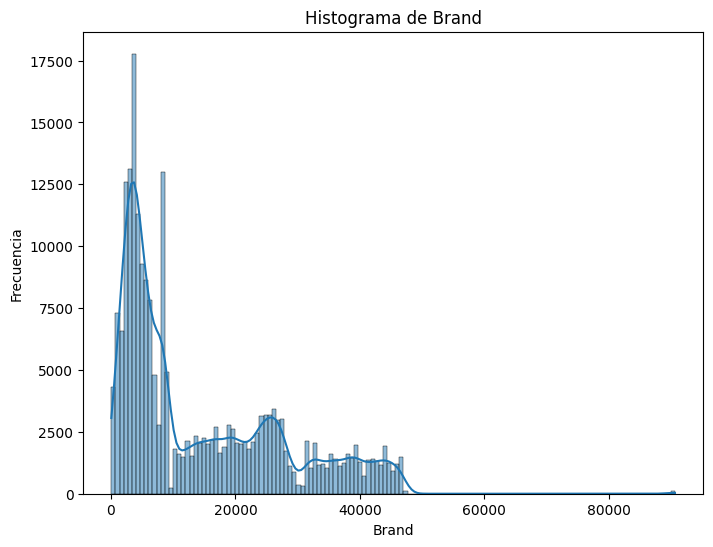

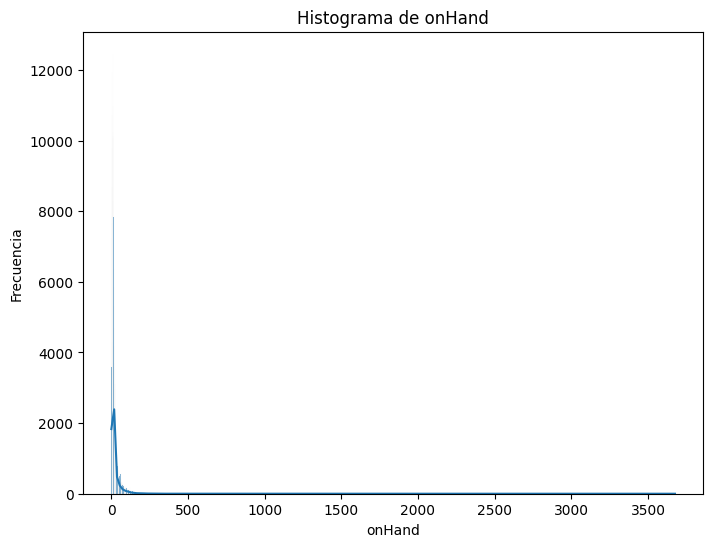

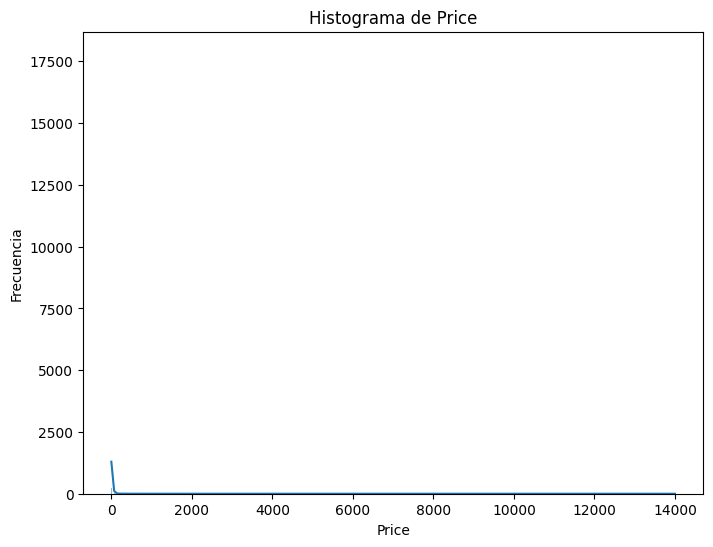

In [14]:
# prompt: histogramas

# Histogramas para cada columna numérica
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(End_Inv[col], kde=True)  # kde=True para mostrar la curva de densidad
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

(224489, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224489 entries, 0 to 224488
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  224489 non-null  object 
 1   Store        224489 non-null  int64  
 2   City         223205 non-null  object 
 3   Brand        224489 non-null  int64  
 4   Description  224489 non-null  object 
 5   Size         224489 non-null  object 
 6   onHand       224489 non-null  int64  
 7   Price        224489 non-null  float64
 8   endDate      224489 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 15.4+ MB
None
                  InventoryId  Store          City  Brand  \
endDate                                                     
2016-12-31  1_HARDERSFIELD_58      1  HARDERSFIELD     58   
2016-12-31  1_HARDERSFIELD_62      1  HARDERSFIELD     62   
2016-12-31  1_HARDERSFIELD_63      1  HARDERSFIELD     63   
2016-12-31  1_HARDERSFIELD_72   

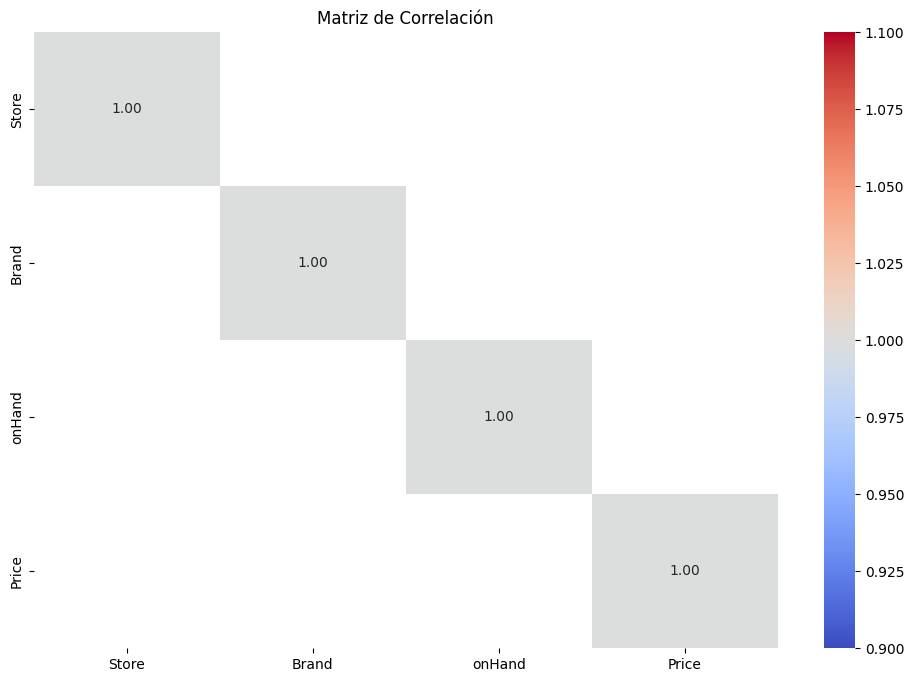

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/seasonal.py:358: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xlim)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/seasonal.py:358: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xlim)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/seasonal.py:358: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xlim)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/seasonal.py:358: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xlim)


<Figure size 1200x800 with 0 Axes>

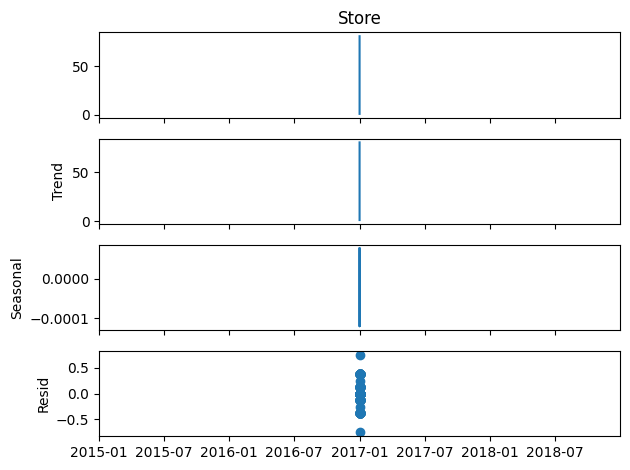

In [13]:
# prompt: series temporales

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

# Cargar datos (Asumiendo que el archivo 'EndInvFinal.csv' está en el directorio de trabajo)
# Si no es así, proporciona la ruta correcta
try:
    End_Inv = pd.read_csv('/content/EndInvFinal.csv')
except FileNotFoundError:
    print("Error: Archivo 'EndInvFinal.csv' no encontrado. Asegúrate de que el archivo exista y la ruta sea correcta.")
    # Puedes usar files.upload() para subir el archivo si no está en Colab
    from google.colab import files
    uploaded = files.upload()
    if 'EndInvFinal.csv' in uploaded:
        End_Inv = pd.read_csv('EndInvFinal.csv')
    else:
        exit()


print(End_Inv.shape)
print(End_Inv.info())

# Formato Fecha
End_Inv['endDate'] = pd.to_datetime(End_Inv['endDate'])
End_Inv.set_index('endDate', inplace=True)
print(End_Inv.head())
print(End_Inv.info())

# Análisis Estadístico con Pandas y Numpy
for col in End_Inv.columns:
    print(col)
    print(End_Inv[col].describe())
    print('---------------------------------')

# Matriz de Correlación
numeric_cols = End_Inv.select_dtypes(include=['float64', 'int64']).columns
if len(numeric_cols) > 0:  # Verificar si hay columnas numéricas
    correlation_matrix = End_Inv[numeric_cols].corr()
    correlation_matrix = correlation_matrix[abs(correlation_matrix) > 0.5]

    plt.figure(figsize=(12, 8))  # Ajustar el tamaño de la figura
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Matriz de Correlación')
    plt.show()
else:
    print("No hay columnas numéricas para calcular la matriz de correlación.")


# Descomposición de series temporales (ejemplo con la primera columna numérica)
if len(numeric_cols) > 0:
    series = End_Inv[numeric_cols[0]]
    decomposition = seasonal_decompose(series, model='additive', period=4) # o 'multiplicative'

    plt.figure(figsize=(12, 8))
    decomposition.plot()
    plt.show()

    # Agregar más análisis de series temporales aquí, por ejemplo:
    # - Autocorrelación (ACF y PACF)
    # - Modelos ARIMA, SARIMA, etc.
else:
  print("No hay columnas numéricas para realizar la descomposición de series temporales.")